In [23]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

N_SPLITS = 10
N_REPEATS = 10

kf = RepeatedKFold(n_splits=N_SPLITS, random_state=42, n_repeats=N_REPEATS)

model_df = pd.read_csv('../../../csv/vdi_entailment_scores_chunk_size_512_all_chunks_bart_large_with_manual.csv')
model_df = model_df.sort_values(by=['company', 'year'])

In [24]:
x_columns = [f"score_q{i}" for i in range (1, 70)]

X = model_df.loc[:, x_columns].to_numpy()
y = model_df.loc[:, "vdi_score_unscaled"].to_numpy()

In [25]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

Fold 1 - MSE: 39.7143
Fold 2 - MSE: 12.0935
Fold 3 - MSE: 20.0257
Fold 4 - MSE: 309.4546
Fold 5 - MSE: 13.0246
Fold 6 - MSE: 14.8786
Fold 7 - MSE: 26.8490
Fold 8 - MSE: 14.2856
Fold 9 - MSE: 4.2607
Fold 10 - MSE: 16.3963
Fold 11 - MSE: 5.4677
Fold 12 - MSE: 14.3720
Fold 13 - MSE: 19.3696
Fold 14 - MSE: 19.1580
Fold 15 - MSE: 307.7991
Fold 16 - MSE: 12.3908
Fold 17 - MSE: 22.2422
Fold 18 - MSE: 24.0487
Fold 19 - MSE: 11.7835
Fold 20 - MSE: 33.0419
Fold 21 - MSE: 12.6725
Fold 22 - MSE: 28.0510
Fold 23 - MSE: 4.1896
Fold 24 - MSE: 31.8195
Fold 25 - MSE: 16.9573
Fold 26 - MSE: 311.5199
Fold 27 - MSE: 14.3469
Fold 28 - MSE: 15.3561
Fold 29 - MSE: 17.5354
Fold 30 - MSE: 17.5413
Fold 31 - MSE: 320.0049
Fold 32 - MSE: 12.4926
Fold 33 - MSE: 11.1347
Fold 34 - MSE: 21.8146
Fold 35 - MSE: 13.0681
Fold 36 - MSE: 22.3899
Fold 37 - MSE: 17.5336
Fold 38 - MSE: 22.9825
Fold 39 - MSE: 21.2681
Fold 40 - MSE: 8.4077
Fold 41 - MSE: 316.0334
Fold 42 - MSE: 18.7577
Fold 43 - MSE: 8.9080
Fold 44 - MSE: 42.59

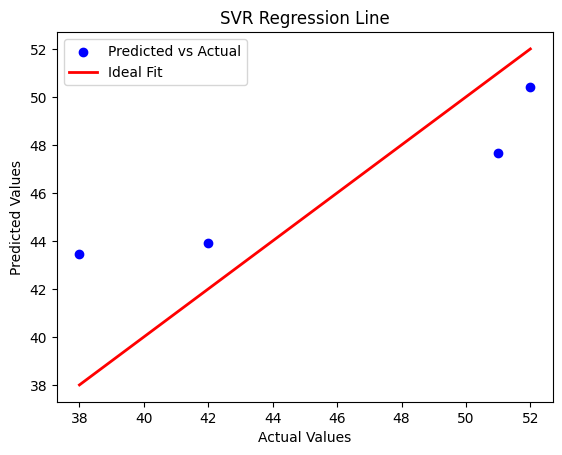

In [26]:
average_mse = 0

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

    regressor = SVR()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
    y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Fold {i+1} - MSE: {mse:.4f}")

    average_mse += (mse/(N_SPLITS*N_REPEATS))

import matplotlib.pyplot as plt

print(f"Average MSE: {average_mse:.4f}")

# Plot the regression line
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Regression Line')
plt.legend()
plt.show()